### Textrank

## Convert Corpora to JSON

In [34]:
from pytextrank import *
import networkx as nx
from nlp_master import Corpora
import matplotlib.pyplot as plt
import json
import seaborn as sns
%matplotlib inline

corpus = Corpora(paths=["01_data/01_Clustering_definitions"], names=["Clustering"])
raw_corpus = {"id": 777, "text": corpus.raw_corpora["clustering"]}

with open("data.json", "w") as f_json:
    json.dump(raw_corpus, f_json)

## Defining Path for different stage ouputs

In [25]:
path_stage0 = "data.json"
path_stage1 = "out_1.json"
path_stage2 = "out_2.json"

In [26]:
with open(path_stage1, 'w') as f:
    for graf in parse_doc(json_iter(path_stage0)):
        f.write("%s\n" % pretty_print(graf._asdict()))

## Stage 2

In [27]:
graph, ranks = pytextrank.text_rank(path_stage1)
pytextrank.render_ranks(graph, ranks)

Im using the changed function build_graph()


### A function which only keeps the most important nodes, depending on the outcomming and incomming links

In [29]:
def thin_out_graph(graph: nx.DiGraph, threshold: float) -> nx.DiGraph:
    nodes = nx.nodes(graph)

    # parsing n_amount into list
    lst_keep = []
    lst_remove = []
    for node in nodes:
        neighbors = nx.all_neighbors(graph, node)
        counter = 0
        dic = dict()
        for neighbor in neighbors:
            counter += 1
            dic.update({"node": node, "n_amount": counter})
        if counter >= threshold:
            lst_keep.append(dic)
        else:
            lst_remove.append(dic)

    # Remove Nodes from Graph
    for node in lst_remove:
        graph.remove_node(node["node"])

    return graph


### Visualization of the Graph (Only nodes with 6 or more links are kept)

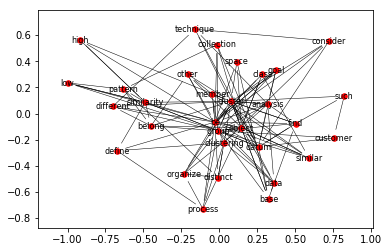

In [31]:
graph_to_visualize = thin_out_graph(graph, 5)
pos = nx.spring_layout(graph_to_visualize, k=1)  # Key is the factor which defines the space between nodes
nx.draw_networkx_nodes(graph_to_visualize,
                       pos=pos,
                       node_size=30,
                       cmap="cividis")

nx.draw_networkx_edges(graph_to_visualize,
                       pos=pos,
                       width=0.5,
                       arrowstyle="-",
                       cmap="inferno")

nx.draw_networkx_labels(graph_to_visualize, pos=pos, font_size=8, font_family='sans-serif')
plt.show()

### Visualization of Heatmap


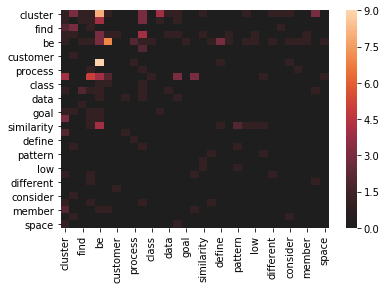

In [35]:
df_am = nx.to_pandas_adjacency(graph)
sns.heatmap(data=df_am, center=0)
plt.show()


## Extracting Keywords

In [37]:
with open(path_stage2, 'w') as f:
    # RL is euqal to an ranked lexeme
    # TODO What is an ranked lexeme?
    for rl in pytextrank.normalize_key_phrases(path_stage1, ranks):
        f.write("%s\n" % pytextrank.pretty_print(rl._asdict()))  # TODO JSON is not well formed..
        # to view output in this notebook
        if rl is not None:
            print(rl)


RankedLexeme(text='clustering algorithms', rank=0.042168033430374556, ids=[1, 2], pos='np', count=1)
RankedLexeme(text='group', rank=0.035584747434453785, ids=[6], pos='np', count=3)
RankedLexeme(text='abstract objects', rank=0.03441682171004809, ids=[34, 35], pos='np', count=1)
RankedLexeme(text='is', rank=0.032870158501609376, ids=[8], pos='vbz', count=56)
RankedLexeme(text='data', rank=0.03082563648067755, ids=[4], pos='np', count=5)
RankedLexeme(text='cluster analysis groups', rank=0.021084016715187278, ids=[1, 37, 6], pos='np', count=1)
RankedLexeme(text='instance', rank=0.021037157391381598, ids=[157], pos='np', count=4)
RankedLexeme(text='high similarity', rank=0.018957108757344854, ids=[78, 49], pos='np', count=1)
RankedLexeme(text='group customers', rank=0.017792373717226893, ids=[6, 13], pos='np', count=1)
RankedLexeme(text='similar objects', rank=0.0172270170284411, ids=[9, 35], pos='np', count=1)
RankedLexeme(text='further data analysis', rank=0.015412818240338775, ids=[89,


RankedLexeme(text='product', rank=0.000914265521684387, ids=[82], pos='nn', count=1)
RankedLexeme(text='n', rank=0.0008924880722545748, ids=[71], pos='nn', count=1)
RankedLexeme(text='insurance', rank=0.0008842181464096407, ids=[11], pos='nn', count=1)
RankedLexeme(text='stage', rank=0.0008842181464096407, ids=[95], pos='nn', count=1)
RankedLexeme(text='checking', rank=0.0008842181464096407, ids=[152], pos='vbg', count=1)
RankedLexeme(text='section', rank=0.0008842181464096407, ids=[176], pos='nnp', count=1)
RankedLexeme(text='reasons', rank=0.0008842181464096407, ids=[207], pos='nns', count=1)
RankedLexeme(text='plot', rank=0.0008772303375685814, ids=[134], pos='nn', count=1)
RankedLexeme(text='overlapping', rank=0.0008715926218062803, ids=[181], pos='vbg', count=1)
RankedLexeme(text='association', rank=0.0008695644944811411, ids=[173], pos='nn', count=1)
RankedLexeme(text='utility', rank=0.0008676031957079124, ids=[93], pos='nn', count=1)
RankedLexeme(text='centroid', rank=0.0008676